In [2]:
from pathlib import Path
import cv2 as cv
from matplotlib import pyplot as plt
from tqdm import tqdm
import numpy as np
import os
import openslide

thispath = Path.cwd().resolve()

In [14]:
def check_corners(img):
    """
    This function checks the corner pixels of an image and returns the BGR values for the background.

    Parameters
    ----------
    img (numpy.ndarray): Image data

    Returns
    -------
    background_pixel (numpy.ndarray): BGR values for the background
    """
    cropped_image = img.copy()
    width, height, _ = cropped_image.shape
    cropped_image = cropped_image[250:width-250, 250:height-1]
    width, height, _ = cropped_image.shape
    top_left = img[0, 0, :]
    top_right = img[width-1, 0, :]
    bottom_left = img[0, height-1, :]
    bottom_right = img[width-1, height-1, :]
    most_frequent = np.argmax(np.bincount([np.sum(top_left), np.sum(top_right), np.sum(bottom_left), np.sum(bottom_right)]))

    if most_frequent == np.sum(top_left):
        return top_left
    
    elif most_frequent == np.sum(top_right):
        return top_right

    elif most_frequent == np.sum(bottom_left):
        return bottom_left
    
    elif most_frequent == np.sum(bottom_right):
        return bottom_right


def available_magnifications(mpp, level_downsamples):
	mpp = float(mpp)
	if (mpp<0.26):
		magnification = 40
	else:
		magnification = 20
	
	mags = []
	for l in level_downsamples:
		mags.append(magnification/l)
	
	return mags

[PosixPath('/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List2/000031970300399677.svs')]
/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List2/000031970300399677.svs
((201192, 68591), (50298, 17147), (12574, 4286), (3143, 1071))
0.25180000000000002
[40.0, 9.999781307634551, 2.499676916744457, 0.624723701717781]


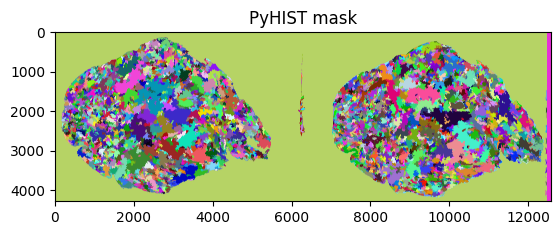

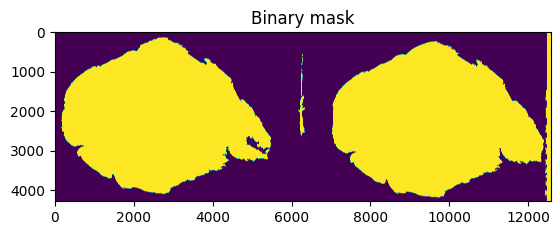

In [15]:

datadir = Path("/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC")

# for i in range(3):
maskdir = Path(thispath.parent / "data" / "Mask_PyHIST_v2" / f"LungAOEC_List2")

image = "000031970300399677"

svs_file = [i for i in datadir.rglob("*.svs") if "LungAOEC" in str(i) and image in str(i)]
print(svs_file)

histo_mask = cv.imread(str(Path(maskdir / image / f"segmented_{image}.ppm")))
print(svs_file[0])
slide = openslide.OpenSlide(str(svs_file[0]))
print(slide.level_dimensions)
mpp = slide.properties['openslide.mpp-x']
print(mpp)

level_downsamples = slide.level_downsamples
mags = available_magnifications(mpp, level_downsamples)
print(mags)

# Mask from PyHIST to binary mask
copy = histo_mask.copy()

most_frequnt = check_corners(copy)
copy[(copy != most_frequnt).any(axis=-1)] = 1
copy[(copy == most_frequnt).all(axis=-1)] = 0
binary_mask = copy[:, :, 0]

plt.imshow(histo_mask)
plt.title("PyHIST mask")
plt.show()


plt.imshow(binary_mask)
plt.title("Binary mask")
plt.show()
